# A. Setup Preparation



## A.1 Preparing the conda environment

In [4]:
%pip install -q condacolab                                                   # only after copying a new file, (if hte line below does not work)

In [5]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


## A.2 Connection with Gdrive

In [1]:
from google.colab import drive                                                    # only after copying a new file
drive.mount('/content/drive')

Mounted at /content/drive


## A.3 Connection with import-ipynb

###  A.3.1 Install import-ipynb to Google Drive

In [ ]:
!pip install --target=/content/drive/MyDrive/colab_packages import-ipynb          # only once

### A.3.2 Add the Path to sys.path Before Importing

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/colab_packages')

## A.3 Importing the notebook library

In [3]:
import import_ipynb
import math

## A.4 The current  Working Folder

In [4]:
import os

In [5]:
!pwd                                                                              #provide the current working directory

/content


### A.4.1 Define the right path location

In [6]:
folder = '5_Projects'                                                # UPDATE AS REQUIRED ********************************************************

In [7]:
base_dir = '/content/drive/My Drive/Colab Notebooks'

In [8]:
folder_structure = os.path.join(base_dir, folder)
print("the current folder should be:",folder_structure)

the current folder should be: /content/drive/My Drive/Colab Notebooks/5_Projects


### A.4.2 Apply the correct path

In [9]:
#Correct the Directory Path if neccessary
os.chdir(folder_structure)
# Confirm that the relevant notebooks are in the same folder
print("change to the directory Ok; the current folder is: -------->",folder_structure)
print("contains:------->",os.listdir())                                                                    # List the files in the current folder

change to the directory Ok; the current folder is: --------> /content/drive/My Drive/Colab Notebooks/5_Projects
contains:-------> ['03a_Column.ipynb', '01_Säbu.ipynb', 'archive', 'condacolab_install.log', 'simple_structure.ifc', '04_Ifc.ipynb', 'funfile.ipynb', '02_MomentConnection.ipynb']


## A.5 Test the import of the notebook file as module

In [10]:
import funfile                                                                    # The name of the file containing the functions

In [11]:
# Test the functions inside the funfile
# Ordinate of the spectrum
SdT = funfile.spect()                                                              # external function located in : funfile>spectrum
print("testing the function:.......Sdt=",SdT)                                                                         # Units: (m/s2)

testing the function:.......Sdt= 385.2989898


# B. Project:Member Design according to EN 1993

## B.1. Variables ...............

In [12]:
b = float(34)                                                                          # 3. INPUT Geometry
tf = float(12)
tw = float(12)
H = float(13)

M = float(22)
W = float(13)

# B.2. The functions of the components.................

## B.2.1 Import the functions

In [13]:
import funfile                                                                    # The name of the file containing the functions;
import importlib
importlib.reload(funfile)                                                         # Reload after changes

ModuleSpec(name='funfile', loader=<import_ipynb.NotebookLoader object at 0x7dc71818f990>, origin='funfile.ipynb')

## B.2.2 Design of members

### Input


In [14]:
fyk = float(235)                          # N/mm2
fuk = float(360)                          # N/mm2
gamma_0 = float(1)                        # (-)
gamma_1 = float(1.1)                       # (-)
gamma_2 =float(1.25)                      # (-)
E = float(210000)                         # N/mm2

In [15]:
# Cross sections'
A = float(1320)                              # mm2
A_net = float(1320)                          # mm2
A_eff = float(1320)                          # mm2      In case of Class IV sections; In other cases A_eff = A; In the following code A_eff will be used
I_strong = float(3178000)                      # mm4
I_weak = float(276700)                         # mm4

In [16]:
# Geometry
l_strong = float(1000)                      # mm                Column length section strong axis
l_weak = float(1000)                        # mm                Column length section weak axis

### Tension 6.2.3
For sections with holes the design tension resistance Nt,Rd should be taken as the smaller of:

a) the design plastic resistance of the gross cross-section

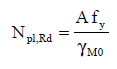

b) the design ultimate resistance of the net cross-section at holes for fasteners

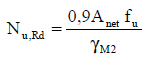

Capacity design acc to (3) not considered

**RESISTANCE IN TENSION:**

In [17]:
N_pl_Rd = funfile.tension(A,A_net,fyk,fuk,gamma_0,gamma_2) # [N]
print (N_pl_Rd,"N")
print(f"{N_pl_Rd/1000:,.2f}","kN")                         # formatted

310200.0 N
310.20 kN


### Compression 6.2.4

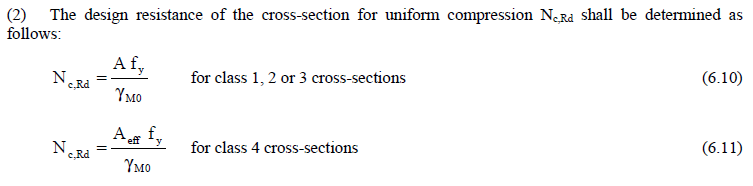

**RESISTANCE IN COMPRESSION**

In [18]:
N_c_Rd = funfile.compression(A_eff,fyk,gamma_0)
print(N_c_Rd, "N")
print(f"{N_c_Rd/1000:,.2f}","kN")                      # formatted

310200.0 N
310.20 kN


#### Buckling 6.3.1.1

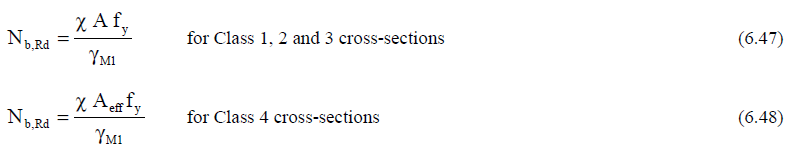

where:

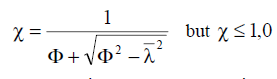

#### ---> Ncrd

In [19]:
#                                                             Critical buckling load on both directions
N_c_Rd_strong = (3.14*3.14*(E)*I_strong)/(l_strong*l_strong)
N_c_Rd_weak = (3.14*3.14*(E)*I_weak)/(l_weak*l_weak)
N_c_Rd_min = min(N_c_Rd_strong, N_c_Rd_weak)
print("Ncrd_strong = ",N_c_Rd_strong, "N")
print(f"{N_c_Rd_strong/1000:,.2f}","kN")                   # formatted
print("Ncrd_weak = ",N_c_Rd_weak, "N")
print(f"{N_c_Rd_weak/1000:,.2f}","kN")                        # formatted
print ("Ncrd_min = ",N_c_Rd_min, "N")
print(f"{N_c_Rd_min/1000:,.2f}","kN")                        # formatted

Ncrd_strong =  6580099.848 N
6,580.10 kN
Ncrd_weak =  572911.7772 N
572.91 kN
Ncrd_min =  572911.7772 N
572.91 kN


#### ----> Imperfection alpha..............

In [20]:
#
alpha = 0.49                                              #  HARD CODED

#### ----> Slenderness lamda

In [21]:
lamda = funfile.lamda(A_eff, fyk, N_c_Rd_min)
print(lamda)

0.7358292063199653


#### ----> factor fi

In [22]:
fi = funfile.fi(alpha,lamda)
print(fi)

0.9020004659851265


#### ---> reduction xita

In [23]:
xita = funfile.xita(lamda,fi)
print(xita)

0.702399982996835


#### ---> Nbrd

In [24]:
N_b_Rd = xita * (A_eff*fyk/(gamma_1))
print("xita= ",xita,)
print("Aeff= ",A_eff*100," mm2")
print("fyk= ",fyk, "N/mm2")
print("gama =",gamma_1)
print("Nbrd =",format(N_b_Rd,',.1f',), "N")

xita=  0.702399982996835
Aeff=  132000.0  mm2
fyk=  235.0 N/mm2
gama = 1.1
Nbrd = 198,076.8 N


# B.2.1 Total result .................

In [25]:
print("Resistance in tension:")
print(f"{N_pl_Rd/1000:,.2f}","kN")            # formatted
print("Resistance in buckling:")
#print("Nbrd =",format(N_b_Rd,',.1f',), "N")
print(f"{N_b_Rd/1000:,.2f}","kN")            # formatted

Resistance in tension:
310.20 kN
Resistance in buckling:
198.08 kN
